<a href="https://colab.research.google.com/github/KaziMuktadirAhmed/WISER-womenium-2025-project-1/blob/refactor/WISER-quantum-walk-monte-carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Run this cell first to install all necessary packages.
# After this finishes, you MUST restart the runtime.
# Go to the menu: Runtime -> Restart session
!pip install -q qiskit qiskit-aer matplotlib pylatexenc
!pip install qiskit-ibm-runtime
print("✅ All packages installed successfully. Please restart the runtime now.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 5.3 MB/s eta 0:00:0

## All imports

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManhattanV2, FakeTorino
from qiskit_aer.noise import NoiseModel
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import defaultdict
import os

## Practice cells


--- Generating Circuit Diagram ---
Displaying circuit diagram in cell output:


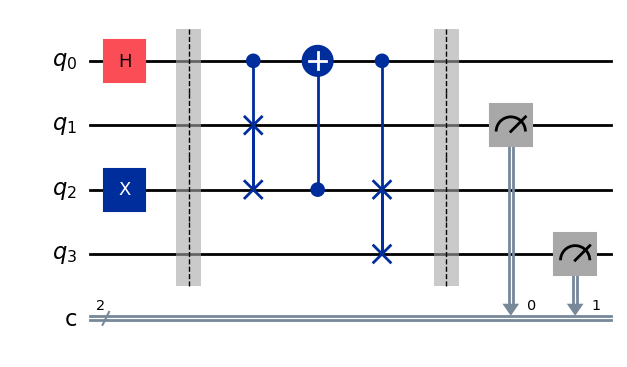


--- Simulation Results ---
{'01': 4067, '10': 4125}

--- Generating Histogram ---
Displaying histogram in cell output:


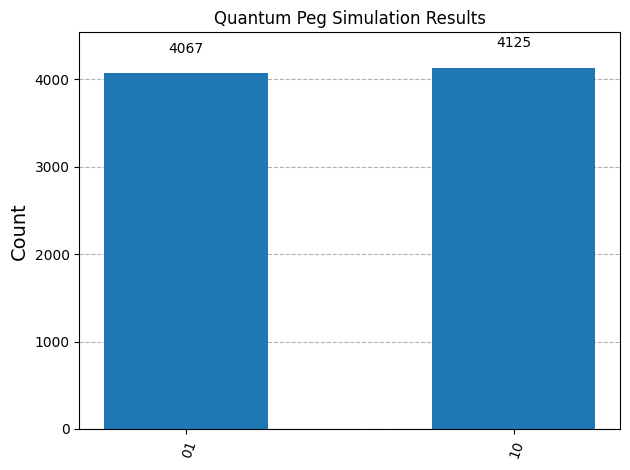

In [3]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    """
    Generates a Qiskit QuantumCircuit for a single 'quantum peg' as
    described in the "Universal Statistical Simulator" paper (Fig. 3).

    The circuit uses 4 qubits, mapped as follows from the paper:
    - q0: The control qubit that determines the path (left/right).
    - q1: The 'left' output channel.
    - q2: The input channel where the 'ball' starts.
    - q3: The 'right' output channel.

    Returns:
        QuantumCircuit: A Qiskit circuit object representing one quantum peg.
    """
    qc = QuantumCircuit(4, 2, name="Quantum Peg")
    qc.x(2)
    qc.h(0)
    qc.barrier()
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("mpl")

    if IS_IPYTHON:
        print("Displaying circuit diagram in cell output:")
        display(circuit_diagram)

    circuit_filename = "quantum_peg_circuit.png"
    # circuit_diagram.savefig(circuit_filename)
    # print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    simulator = AerSimulator()
    compiled_circuit = transpile(peg_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=8192)
    result = job.result()
    counts = result.get_counts(compiled_circuit)

    print("\n--- Simulation Results ---")
    print(counts)

    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(counts, title="Quantum Peg Simulation Results")

    if IS_IPYTHON:
        print("Displaying histogram in cell output:")
        display(histogram_figure) # This renders the plot in the notebook

    # histogram_filename = "quantum_peg_histogram.png"
    # histogram_figure.savefig(histogram_filename)
    # print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    plt.close('all')


--- Generating Circuit Diagram ---


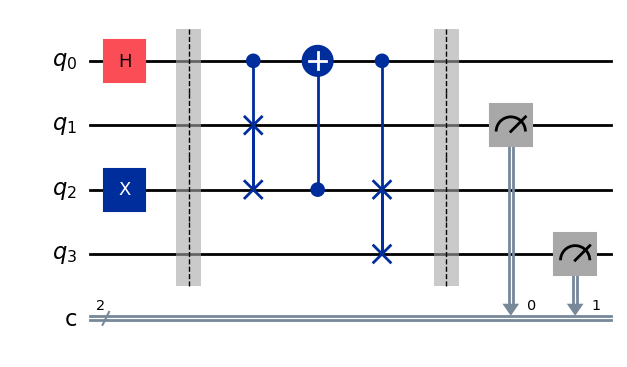

Circuit diagram also saved to: /content/quantum_peg_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Probabilities) ---
{'01': 0.4910888671875, '10': 0.5089111328125}

--- Generating Histogram ---


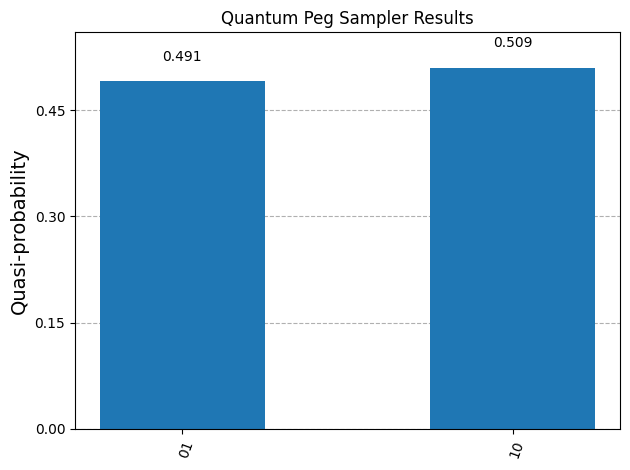

Histogram also saved to: /content/quantum_peg_histogram.png


In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    qc = QuantumCircuit(4, 2, name="Quantum Peg")

    qc.x(2)
    qc.h(0)
    qc.barrier()
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("mpl")
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = "quantum_peg_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(peg_circuit, shots=8192)
    result = job.result()

    quasi_dist = result.quasi_dists[0]
    probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Probabilities) ---")
    print(probabilities)

    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(probabilities, title="Quantum Peg Sampler Results")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = "quantum_peg_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    plt.close('all')

## Utility funtions

In [5]:
def draw_circuit(circuit):
    try:
        from IPython.display import display
        IS_IPYTHON = True
    except ImportError:
        IS_IPYTHON = False

    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer QGB ---")
    circuit_diagram = qgb_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_qgb_circuit.png"
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    return circuit.draw(output='mpl', fold=-1)

In [6]:
def run_circuit_using_sampler(circuit, shots=9000):
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(circuit, shots=shots)
    result = job.result()
    return result

In [7]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

def draw_histogram(result, n_layers, precision=10):
    """
    Analyzes, prints, and plots the sampler result with specified precision.
    """
    try:
        from IPython.display import display
        IS_IPYTHON = True
    except ImportError:
        IS_IPYTHON = False

    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Raw Bitstring Probabilities) ---")
    print("{")
    # Iterate and print each key-value pair with formatted precision
    for k, v in sorted(raw_probabilities.items()):
        print(f"  '{k}': {v:.{precision}f},")
    print("}")


    # 5. Plot the raw distribution with bitstrings on the x-axis
    print("\n--- Generating Raw Distribution Histogram ---")
    # Note: The plot_histogram function's label precision is handled by matplotlib automatically.
    # This code primarily changes the console output.
    histogram_figure = plot_histogram(
        raw_probabilities,
        title=f"Probability Distribution for QGB with ({n_layers} Layers)"
    )
    if IS_IPYTHON:
        display(histogram_figure)
    else:
        # If not in an IPython environment, you might want to explicitly show or save the plot
        # plt.show()  # This will block script execution until the plot window is closed
        pass # Or save it: histogram_figure.savefig('histogram.png')

    # Close all plot figures to free up memory
    plt.close('all')

## Task 2

- You may use any quantum SDK and platform for your implementation.
- Using the 1- and 2-layer Galton Box code as a starting point,
  + write a general algorithm that generates a circuit for any number of layers.
  + Run and verify that the output is a Gaussian distribution.   

In [8]:
def create_n_layer_qgb(n_layers: int):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the N-layer QGB.
    """
    # An n-layer board has n+1 output bins.
    # Total qubits needed: 1 (control) + (n_layers + 1) (for outputs) + n_layers (for intermediate paths)
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1  # Add 1 for the control qubit
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    # Place the initial 'ball' at the top of the pyramid.
    # Qubit indices are offset by 1 because q0 is the control.
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        # For each layer, reset and re-superpose the control qubit
        qc.reset(control_qubit)
        qc.h(control_qubit)

        # Determine the positions of the pegs in the current layer
        # These are the possible locations of the ball from the previous layer.
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            # Apply the standard "quantum peg" logic
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            # As per the paper's description, a rebalancing CNOT is needed
            # to ensure the control qubit is correctly prepared for the next peg in the same row.
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    # The final output bins are the odd-numbered working qubits.
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc


--- Generating Circuit Diagram for 6-Layer QGB ---


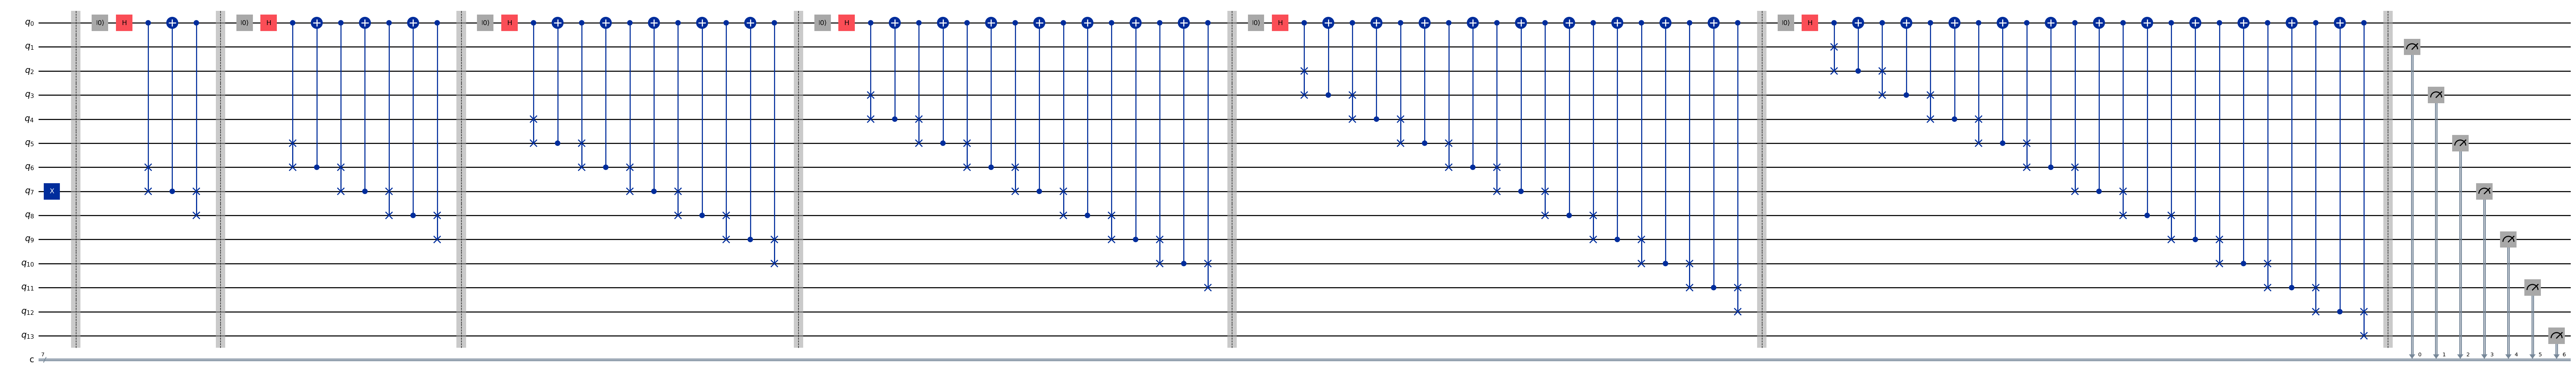

Circuit diagram also saved to: /content/6_layer_qgb_circuit.png


In [ ]:
# --- Example Usage ---
if __name__ == '__main__':
    # Define the number of layers for the Galton Board
    N_LAYERS = 6

    # 1. Create the N-layer QGB circuit
    qgb_circuit = create_n_layer_qgb(N_LAYERS)

    # 2. Draw the circuit and display/save it
    draw_circuit(qgb_circuit)

    # 3. Use the Sampler to run the circuit
    result = run_circuit_using_sampler(qgb_circuit)

    # 4. Process the results from the Sampler
    draw_histogram(result, N_LAYERS)

## Distribution generators

In [ ]:
def create_gaissuian_dist(n_layers: int):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the N-layer QGB.
    """
    # An n-layer board has n+1 output bins.
    # Total qubits needed: 1 (control) + (n_layers + 1) (for outputs) + n_layers (for intermediate paths)
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1  # Add 1 for the control qubit
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    # Place the initial 'ball' at the top of the pyramid.
    # Qubit indices are offset by 1 because q0 is the control.
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        # For each layer, reset and re-superpose the control qubit
        qc.reset(control_qubit)
        qc.h(control_qubit)

        # Determine the positions of the pegs in the current layer
        # These are the possible locations of the ball from the previous layer.
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            # Apply the standard "quantum peg" logic
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            # As per the paper's description, a rebalancing CNOT is needed
            # to ensure the control qubit is correctly prepared for the next peg in the same row.
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    # The final output bins are the odd-numbered working qubits.
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

In [ ]:
def create_hadamard_walk_qgb(n_layers: int):
    """
    Generates a Qiskit Circuit for a Quantum Galton Board that performs
    a Hadamard Quantum Walk. This is achieved by using a bias angle of pi/2,
    which is equivalent to using a Hadamard gate as the "coin" at each step.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the Hadamard Walk QGB.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer Hadamard Walk")

    control_qubit = 0
    bias_angle = np.pi / 2  # This angle makes the Rx gate act like a Hadamard

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.rx(bias_angle, control_qubit)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

        if layer < n_layers - 1:
            qc.h(control_qubit)
            qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

In [ ]:
def create_exponential_dist(n_layers: int, target_distribution="exponential_custom"):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board with a left-skewed exponential distribution.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)

    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        qc.reset(control_qubit)

        base_bias = 150 * (np.pi/180)
        qc.rx(base_bias, control_qubit)

        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

## Noisy circuit simulation

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManhattanV2, FakeTorino
from qiskit_aer.noise import NoiseModel
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import defaultdict
import os

def get_available_devices():
    """
    List available fake backend devices
    """
    devices = {
        'manhattan': FakeManhattanV2,
        'torino': FakeTorino,
    }
    return devices

def run_noisy_simulation(circuit, shots=8192, device_name='manhattan'):
    """
    Run the circuit with device noise model simulation
    """
    # Get available devices
    devices = get_available_devices()

    # Create fake device backend
    if device_name.lower() in devices:
        fake_device = devices[device_name.lower()]()
    else:
        print(f"Unknown device '{device_name}'. Available devices: {list(devices.keys())}")
        print("Using default: FakeManhattan")
        fake_device = FakeManhattan()

    print(f"Using device: {fake_device.name}")
    print(f"Circuit requires {circuit.num_qubits} qubits, device has {fake_device.num_qubits} qubits")

    # Check if circuit fits on device
    if circuit.num_qubits > fake_device.num_qubits:
        print(f"WARNING: Circuit needs {circuit.num_qubits} qubits but device only has {fake_device.num_qubits}")
        print("Falling back to noise-model-only simulation (no coupling map constraints)")

        # Create noise model from the fake device
        noise_model = NoiseModel.from_backend(fake_device)

        # Create AerSimulator with noise model
        sim_noisy = AerSimulator(noise_model=noise_model)

        # Transpile with basic optimization only
        transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=0)

    else:
        # Create noise model from the fake device
        noise_model = NoiseModel.from_backend(fake_device)

        # Get device properties
        coupling_map = fake_device.coupling_map
        basis_gates = fake_device.basis_gates

        # Create AerSimulator with noise model
        sim_noisy = AerSimulator(
            noise_model=noise_model,
            coupling_map=coupling_map,
            basis_gates=basis_gates
        )

        # Transpile circuit for the noisy backend with higher optimization
        try:
            transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=3)
        except Exception as e:
            print(f"High optimization failed: {e}")
            print("Trying with coupling map disabled...")
            sim_noisy = AerSimulator(noise_model=noise_model)
            transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=1)

    print(f"Original circuit depth: {circuit.depth()}")
    print(f"Transpiled circuit depth: {transpiled_circuit.depth()}")
    print(f"Number of qubits on device: {fake_device.num_qubits}")

    # Run the noisy simulation
    job = sim_noisy.run(transpiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(0)

    return counts, noise_model, transpiled_circuit, result

In [ ]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

def draw_noisy_histogram(counts, title="Noisy Simulation Results"):
    """
    Plots a histogram from a dictionary of counts.
    """
    try:
        from IPython.display import display
        IS_IPYTHON = True
    except ImportError:
        IS_IPYTHON = False

    # The plot_histogram function directly accepts a counts dictionary
    print("\n--- Generating Histogram from Noisy Counts ---")
    histogram_figure = plot_histogram(
        counts,
        title=title
    )

    if IS_IPYTHON:
        display(histogram_figure)
    else:
        # If not in an IPython environment, you can show the plot in a new window
        # or save it to a file.
        # plt.show()
        pass

    # Close all plot figures to free up memory
    plt.close('all')

## Example usage


--- Generating Circuit Diagram for 6-Layer QGB ---


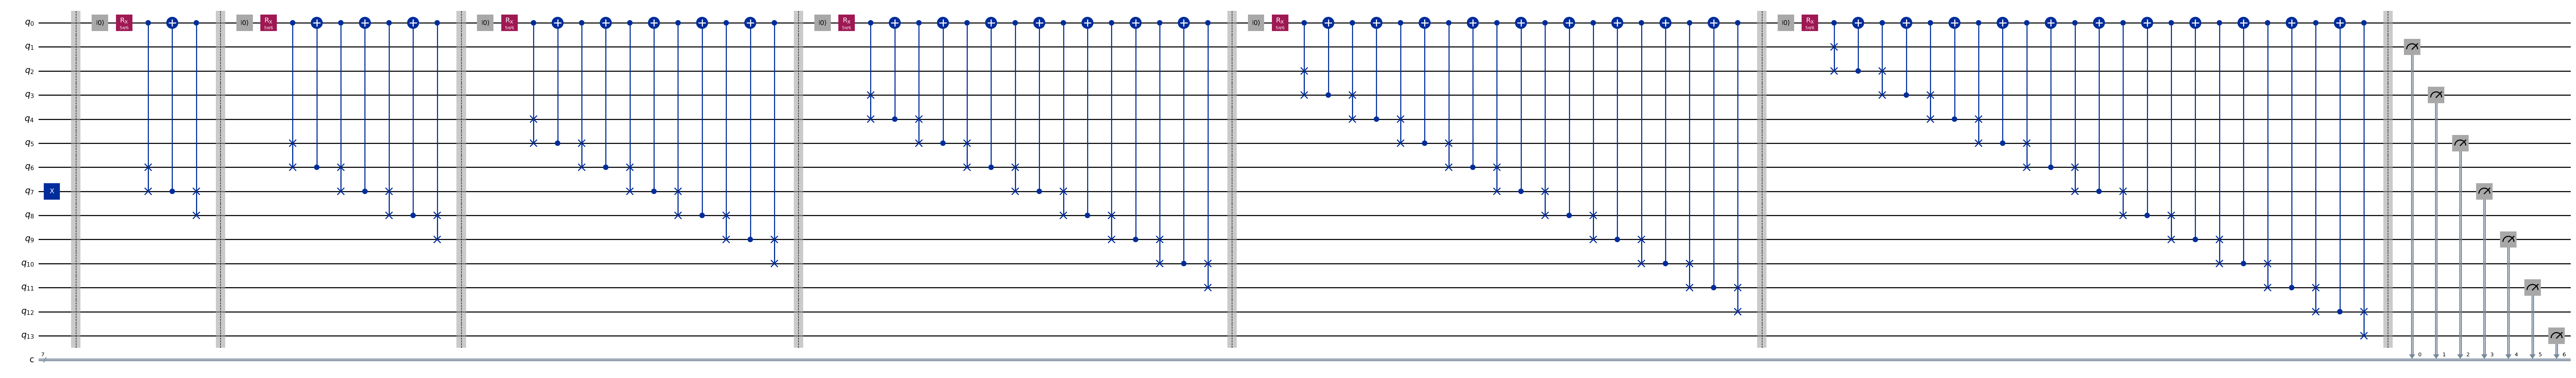

Circuit diagram also saved to: /content/6_layer_qgb_circuit.png

--- Running circuit with Sampler ---


/tmp/ipython-input-948425331.py:13: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  result = run_circuit_using_sampler(qgb_circuit, shots=50000)



--- Sampler Results (Raw Bitstring Probabilities) ---
{
  '0000001': 0.6615600000,
  '0000010': 0.2825000000,
  '0000100': 0.0507200000,
  '0001000': 0.0050400000,
  '0010000': 0.0001800000,
}

--- Generating Raw Distribution Histogram ---


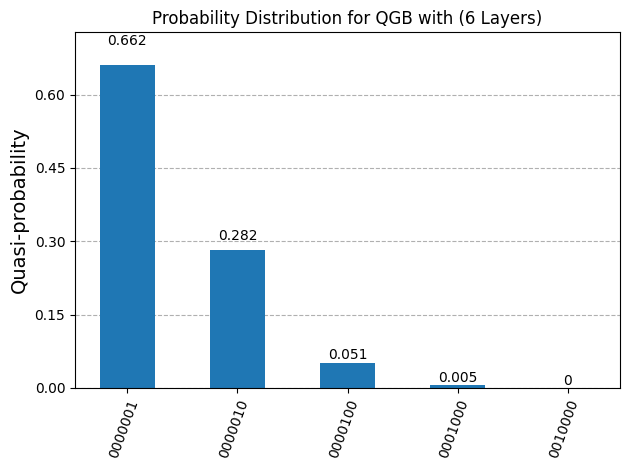

In [ ]:
# --- Example Usage ---
if __name__ == '__main__':
    # Define the number of layers for the Galton Board
    N_LAYERS = 6

    # 1. Create the N-layer QGB circuit
    qgb_circuit = create_exponential_dist(N_LAYERS)

    # 2. Draw the circuit and display/save it
    draw_circuit(qgb_circuit)

    # 3. Use the Sampler to run the circuit
    result = run_circuit_using_sampler(qgb_circuit, shots=50000)

    # 4. Process the results from the Sampler
    draw_histogram(result, N_LAYERS)

## Example run noisy simulation


--- Generating Circuit Diagram for 6-Layer QGB ---


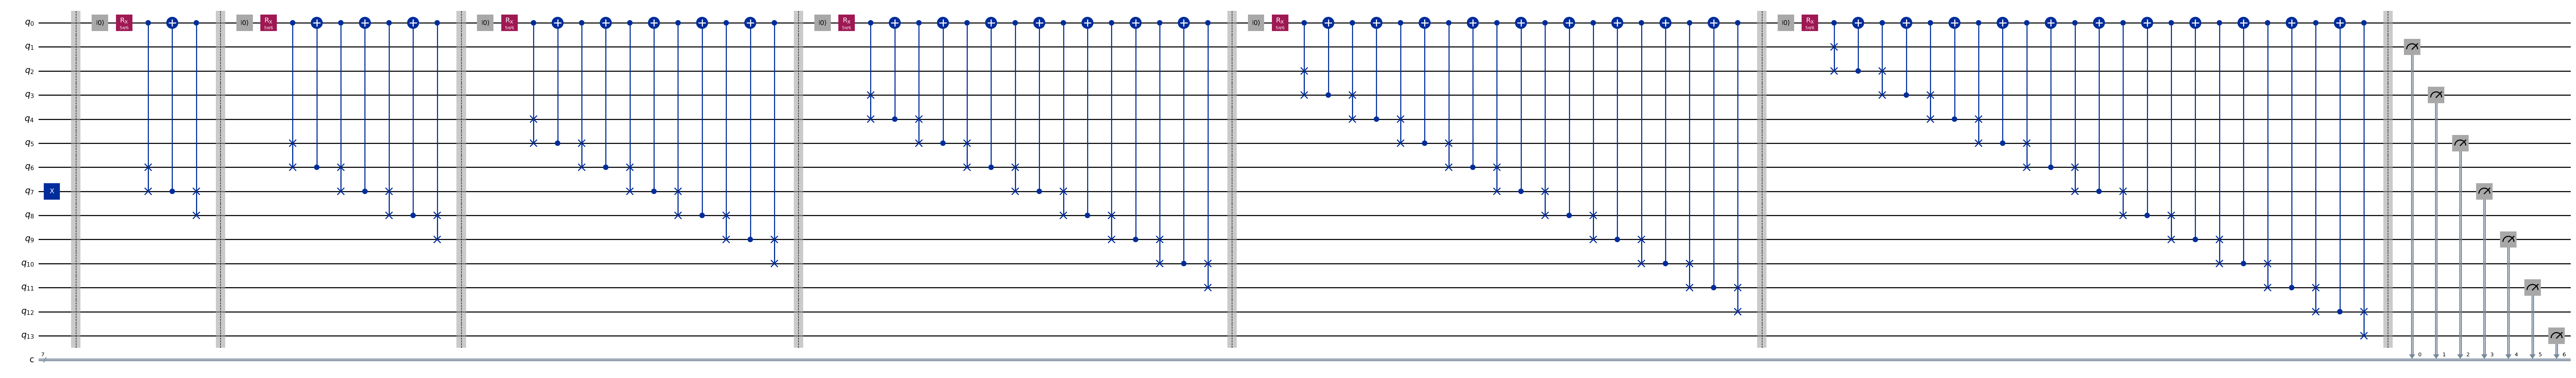

Circuit diagram also saved to: /content/6_layer_qgb_circuit.png
Using device: fake_manhattan
Circuit requires 14 qubits, device has 65 qubits
High optimization failed: 'A connected component of the DAGCircuit is too large for any of the connected components in the coupling map'
Trying with coupling map disabled...
Original circuit depth: 92
Transpiled circuit depth: 668
Number of qubits on device: 65

--- Generating Histogram from Noisy Counts ---


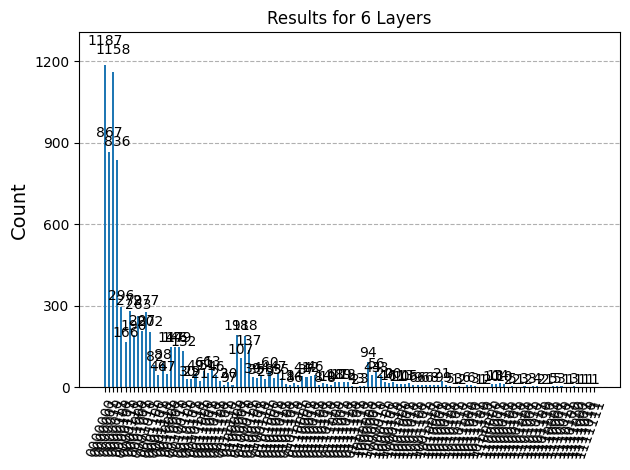

In [ ]:
N_LAYERS = 6
qgb_circuit = create_exponential_dist(N_LAYERS)
draw_circuit(qgb_circuit)
noisy_counts, noise_model, t_circ, result = run_noisy_simulation(qgb_circuit, shots=9000)
draw_noisy_histogram(noisy_counts, title=f"Results for {N_LAYERS} Layers")

## Compare distributions

In [ ]:
def compare_ideal_vs_noisy(circuit, n_layers, shots=8192, device_name='manhattan'):
    """
    Compare ideal simulation vs noisy simulation results
    """
    print("=== IDEAL SIMULATION ===")

    # Use the original Sampler (V1) for compatibility
    sampler = Sampler()
    job = sampler.run(circuit, shots=shots)
    result = job.result()

    # Get counts from the result
    counts_data = result.quasi_dists[0]

    # Convert quasi-distribution to counts and then to probabilities
    ideal_distribution = defaultdict(float, {i: 0.0 for i in range(n_layers + 1)})

    for outcome, probability in counts_data.items():
        # Convert integer outcome to binary string
        bitstring = format(outcome, f'0{n_layers + 1}b')
        try:
            position = bitstring.index('1')
            ideal_distribution[position] += probability
        except ValueError:
            pass

    print("Ideal Results (Probabilities):")
    print({k: v for k, v in sorted(ideal_distribution.items())})

    print("\n=== NOISY SIMULATION ===")
    # Run noisy simulation
    noisy_counts, noise_model, transpiled_circuit = run_noisy_simulation(circuit, shots, device_name)

    # Convert counts to probabilities
    total_shots = sum(noisy_counts.values())
    noisy_distribution = defaultdict(float, {i: 0.0 for i in range(n_layers + 1)})

    for bitstring, count in noisy_counts.items():
        prob = count / total_shots
        try:
            position = bitstring.index('1')
            noisy_distribution[position] += prob
        except ValueError:
            pass

    print("Noisy Results (Probabilities):")
    print({k: v for k, v in sorted(noisy_distribution.items())})

    # Plot comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Ideal histogram
    positions = list(ideal_distribution.keys())
    probabilities = list(ideal_distribution.values())
    ax1.bar(positions, probabilities, alpha=0.7, color='blue')
    ax1.set_title(f'Ideal {n_layers}-Layer QGB Distribution')
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Probability')
    ax1.grid(True, alpha=0.3)

    # Noisy histogram
    positions_noisy = list(noisy_distribution.keys())
    probabilities_noisy = list(noisy_distribution.values())
    ax2.bar(positions_noisy, probabilities_noisy, alpha=0.7, color='red')
    ax2.set_title(f'Noisy {n_layers}-Layer QGB Distribution')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Probability')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()

    if IS_IPYTHON:
        display(fig)
    else:
        plt.show()

    return ideal_distribution, noisy_distribution, noise_model

def total_variation_distance(ideal_dist, noisy_dist):
    total_var_distance = 0.0
    keys = set(ideal_dist.keys()).union(set(noisy_dist.keys()))
    for key in keys:
        total_var_distance += abs(ideal_dist.get(key, 0.0) - noisy_dist.get(key, 0.0))
    return total_var_distance / 2

def jensen_shannon_divergence(dist_p, dist_q):
    """
    Calculate the Jensen-Shannon divergence between two probability distributions.
    The distributions are dictionaries with keys as outcomes and values as probabilities.
    """
    # Combine all keys in both distributions
    keys = set(dist_p.keys()).union(set(dist_q.keys()))

    # Create probability arrays aligned on the union of keys
    p = np.array([dist_p.get(k, 0.0) for k in keys])
    q = np.array([dist_q.get(k, 0.0) for k in keys])

    # Normalize distributions in case they don't sum exactly to 1
    p = p / p.sum()
    q = q / q.sum()

    # Midpoint distribution
    m = 0.5 * (p + q)

    # Define a helper function for KL divergence with zero handling
    def kl_divergence(a, b):
        mask = (a > 0) & (b > 0)
        return np.sum(a[mask] * np.log2(a[mask] / b[mask]))

    # Jensen-Shannon divergence
    jsd = 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)
    return jsd

def wasserstein_distance(dist_p, dist_q):
    """
    Calculate the 1D Wasserstein distance between two probability distributions.
    Distributions are dictionaries with discrete positions as keys and probabilities as values.
    """
    # Sort all possible positions from both distributions
    positions = sorted(set(dist_p.keys()).union(set(dist_q.keys())))

    # Create aligned probability vectors
    p = np.array([dist_p.get(pos, 0.0) for pos in positions])
    q = np.array([dist_q.get(pos, 0.0) for pos in positions])

    # Normalize the distributions to sum to 1
    p = p / p.sum() if p.sum() > 0 else p
    q = q / q.sum() if q.sum() > 0 else q

    # Compute cumulative distribution functions (CDFs)
    cdf_p = np.cumsum(p)
    cdf_q = np.cumsum(q)

    # Compute Wasserstein distance as the sum of absolute differences of CDFs times gaps between positions
    distance = np.sum(np.abs(cdf_p - cdf_q) * np.diff([0] + positions))

    return distance

## Exponential distribution (experiment)


--- Generating circuit for a true exponential distribution with lambda=0.5 ---

--- Original Circuit Diagram (Condensed) ---


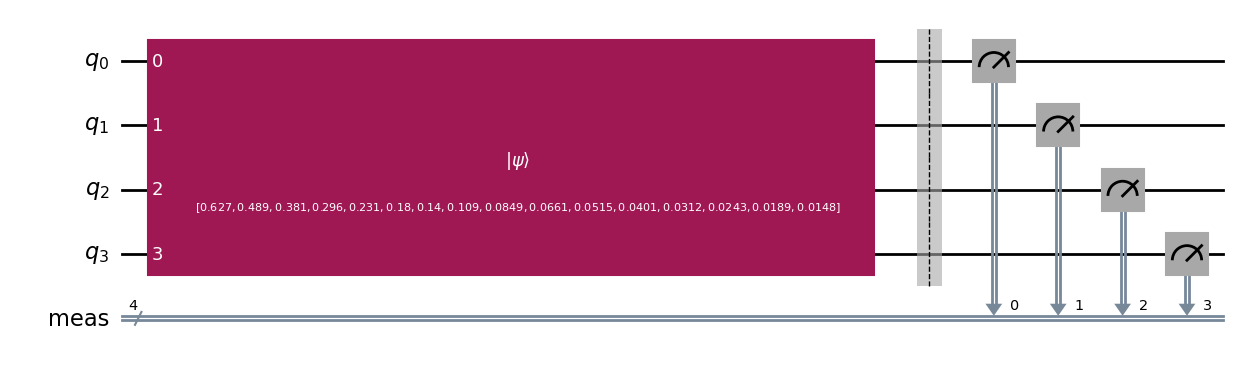


--- Decomposing the circuit to expose the 'initialize' gate ---

--- Decomposed Circuit Diagram (Full) ---


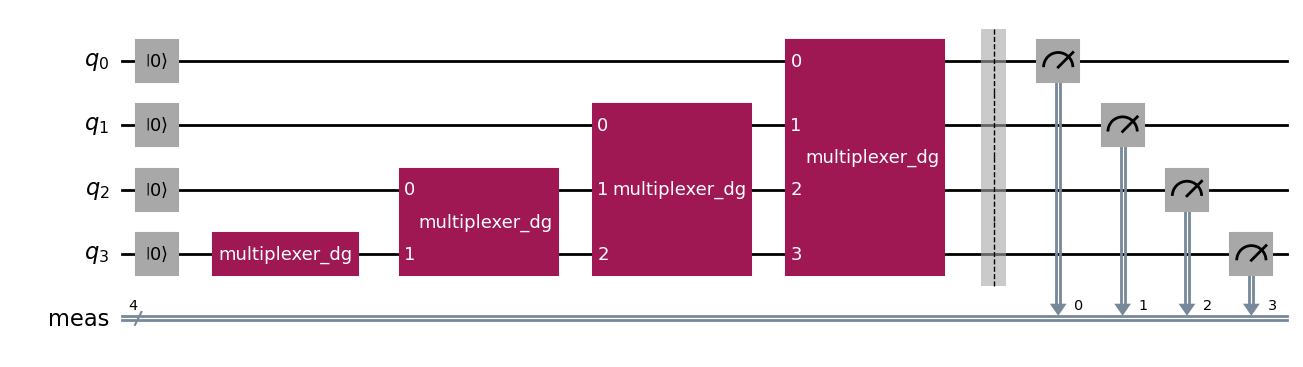


--- Running circuit with Sampler ---

--- Sampler Results (Probabilities) ---
{0: 0.4110107421875, 1: 0.2364501953125, 2: 0.137939453125, 3: 0.080810546875, 4: 0.0521240234375, 5: 0.03173828125, 6: 0.017578125, 7: 0.014892578125, 8: 0.006591796875, 9: 0.00439453125, 10: 0.0025634765625, 11: 0.001708984375, 12: 0.0008544921875, 13: 0.0008544921875, 14: 0.000244140625, 15: 0.000244140625}

--- Generating Final Distribution Histogram ---


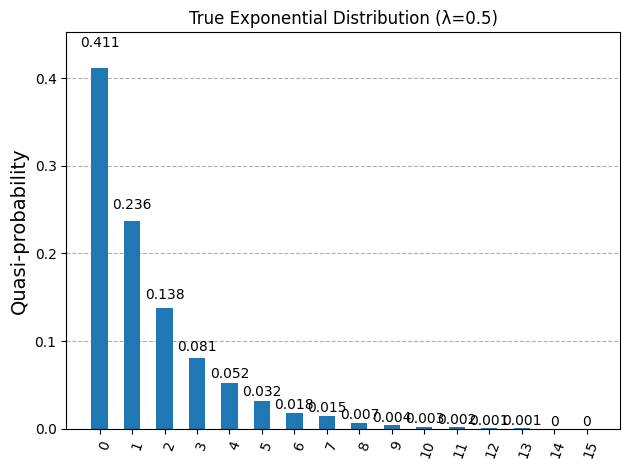


--- Verifying the distribution with a curve fit ---
Fit successful!
Original Lambda: 0.5
Fitted Lambda:   0.5345
R-squared value: 0.999578


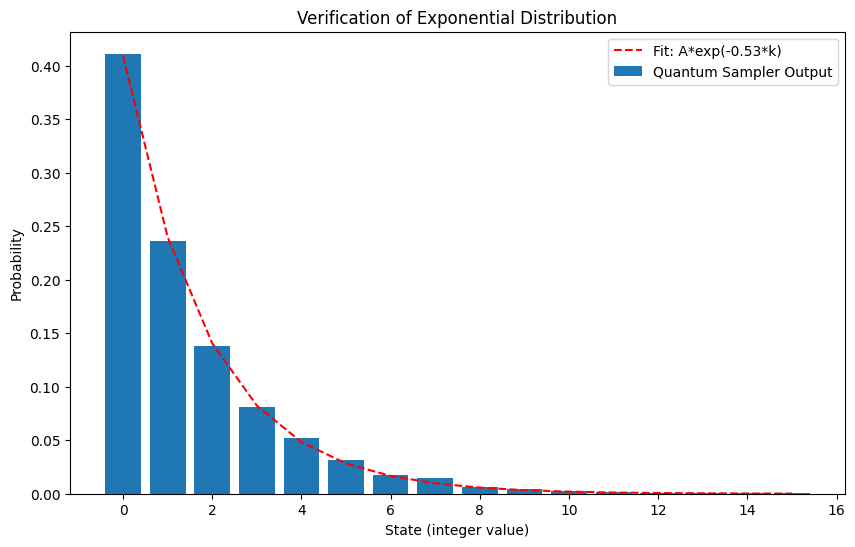

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.optimize import curve_fit

# --- Check if running in an IPython environment for display() ---
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

# --- Previous QGB Simulation Code (for comparison) ---
def create_n_layer_qgb(n_layers: int):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board
    with a left-skewed exponential-like distribution.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1
    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")
    control_qubit = 0
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.barrier()
    for layer in range(n_layers):
        qc.reset(control_qubit)
        base_bias = np.pi / 3
        decay_factor = 0.8
        bias_angle = base_bias * (decay_factor ** layer)
        qc.ry(bias_angle, control_qubit)
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)
        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)
        qc.barrier()
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))
    return qc

# --- NEW: Function to create a true exponential distribution ---
def create_exponential_distribution_circuit(num_qubits: int, decay_lambda: float):
    """
    Generates a circuit that prepares a true exponential probability distribution.

    Args:
        num_qubits: The number of qubits to use. The distribution will have 2**num_qubits points.
        decay_lambda: The decay parameter (lambda) for the exponential distribution P(k) ~ exp(-lambda*k).

    Returns:
        A Qiskit QuantumCircuit object.
    """
    # 1. Classically compute the desired state vector amplitudes
    num_states = 2**num_qubits
    # P(k) = A * exp(-lambda * k) -> amplitude is sqrt(P(k))
    amplitudes = np.exp(-decay_lambda * np.arange(num_states) / 2)

    # 2. Normalize the amplitudes to create a valid quantum state vector
    norm = np.linalg.norm(amplitudes)
    initial_state = amplitudes / norm

    # 3. Create the circuit and initialize the state
    qc = QuantumCircuit(num_qubits)
    qc.initialize(initial_state, range(num_qubits))
    qc.measure_all() # Add measurement to all qubits

    return qc

# --- Main execution block ---
if __name__ == '__main__':
    # --- Parameters ---
    N_QUBITS = 4 # This will give 2**4 = 16 bins
    DECAY_LAMBDA = 0.5 # Controls how quickly the distribution decays

    # --- Generate the circuit ---
    print(f"--- Generating circuit for a true exponential distribution with lambda={DECAY_LAMBDA} ---")
    exp_circuit = create_exponential_distribution_circuit(N_QUBITS, DECAY_LAMBDA)

    # --- Display the original circuit diagram (with the initialize block) ---
    print("\n--- Original Circuit Diagram (Condensed) ---")
    circuit_diagram_original = exp_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram_original)
    else:
        circuit_diagram_original.savefig("exponential_circuit_original.png")
        print("Saved original circuit diagram to exponential_circuit_original.png")

    # --- Decompose the circuit to show the full gate implementation ---
    print("\n--- Decomposing the circuit to expose the 'initialize' gate ---")
    # We chain .decompose() multiple times to ensure full breakdown to basic gates.
    decomposed_circuit = exp_circuit.decompose().decompose().decompose()

    # --- Display the decomposed circuit diagram ---
    print("\n--- Decomposed Circuit Diagram (Full) ---")
    circuit_diagram_decomposed = decomposed_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram_decomposed)
    else:
        # Save the figure if not in a notebook
        circuit_diagram_decomposed.savefig("exponential_circuit_decomposed.png")
        print("Saved decomposed circuit diagram to exponential_circuit_decomposed.png")


    # --- Run the original circuit with the Sampler ---
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    # We run the original (non-decomposed) circuit, as it's more efficient for the simulator
    job = sampler.run(exp_circuit, shots=8192)
    result = job.result()

    # --- Process and plot the results ---
    # The sampler gives probabilities directly for the measured states
    probabilities = result.quasi_dists[0].binary_probabilities()

    # Convert binary keys to integers for plotting
    int_probabilities = {int(k, 2): v for k, v in probabilities.items()}

    print("\n--- Sampler Results (Probabilities) ---")
    print({k: v for k, v in sorted(int_probabilities.items())})

    print("\n--- Generating Final Distribution Histogram ---")
    histogram_figure = plot_histogram(int_probabilities, title=f"True Exponential Distribution (λ={DECAY_LAMBDA})")
    if IS_IPYTHON:
        display(histogram_figure)
    else:
        histogram_figure.savefig("exponential_histogram.png")
        print("Saved histogram to exponential_histogram.png")

    # --- Optional: Curve fitting to verify the result ---
    print("\n--- Verifying the distribution with a curve fit ---")

    def exp_func(k, A, lam):
        return A * np.exp(-lam * k)

    # Prepare data for fitting
    x_data = np.array(sorted(int_probabilities.keys()))
    y_data = np.array([int_probabilities[k] for k in x_data])

    # Perform the curve fit
    try:
        params, covariance = curve_fit(exp_func, x_data, y_data, p0=[1, DECAY_LAMBDA])
        A_fit, lambda_fit = params

        print(f"Fit successful!")
        print(f"Original Lambda: {DECAY_LAMBDA}")
        print(f"Fitted Lambda:   {lambda_fit:.4f}")

        # Calculate R-squared value for goodness of fit
        residuals = y_data - exp_func(x_data, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y_data - np.mean(y_data))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"R-squared value: {r_squared:.6f}")

        # Plot the fit
        plt.figure(figsize=(10, 6))
        plt.bar(x_data, y_data, label='Quantum Sampler Output', zorder=1)
        plt.plot(x_data, exp_func(x_data, *params), 'r--', label=f'Fit: A*exp(-{lambda_fit:.2f}*k)', zorder=2)
        plt.title("Verification of Exponential Distribution")
        plt.xlabel("State (integer value)")
        plt.ylabel("Probability")
        plt.legend()
        if IS_IPYTHON:
            plt.show()
        else:
            plt.savefig("fit_verification.png")
            print("Saved fit verification plot to fit_verification.png")

    except RuntimeError:
        print("Curve fit failed. The data may not be suitable for an exponential fit.")

    # Close all plots
    plt.close('all')



### Hadamard Quantum Walk Quantum Galton Board

This code implements a Quantum Galton Board (QGB) that simulates a Hadamard Quantum Walk.

**Key Features:**

- **Hadamard "Coin":** At each layer, instead of a general rotation, a Hadamard gate is applied to the control qubit. This creates a superposition that is characteristic of a standard quantum walk, where the "particle" has an equal probability of moving left or right at each step in the coin basis.
- **No Intermediate Reset:** Unlike the previous QGB implementations, the control qubit is not fully reset between layers. This preserves the entanglement built up across layers, which is crucial for observing the non-classical interference patterns characteristic of quantum walks.
- **Circuit Structure:** The circuit `create_hadamard_walk_qgb` takes the number of layers as input and constructs the QGB circuit with the Hadamard gate as the coin operator.
- **Simulation and Visualization:** The script simulates the circuit using the Qiskit `Sampler` primitive and plots the resulting probability distribution of the ball's final position. The raw bitstring probabilities are plotted, directly showing the amplitudes in the computational basis.

**Expected Output:**

The resulting distribution from a Hadamard Quantum Walk on a line (which this QGB effectively models) is not a simple binomial distribution like the classical Galton Board. Instead, it exhibits a characteristic shape with peaks further from the center and interference effects, especially visible with a higher number of layers. The histogram shows the probabilities of measuring a '1' in each of the output qubits (corresponding to the bins).


--- Generating Circuit Diagram for 14-Layer Hadamard Walk ---


Circuit diagram also saved to: /content/14_layer_hadamard_walk_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Raw Bitstring Probabilities) ---
{'000000000000001': 6.103515625e-05, '000000000000010': 0.01068115234375, '000000000000100': 0.13134765625, '000000000001000': 0.185546875, '000000000010000': 0.05523681640625, '000000000100000': 0.0445556640625, '000000001000000': 0.05126953125, '000000010000000': 0.04876708984375, '000000100000000': 0.04852294921875, '000001000000000': 0.04925537109375, '000010000000000': 0.05419921875, '000100000000000': 0.1817626953125, '001000000000000': 0.13104248046875, '010000000000000': 0.00775146484375}

--- Generating Raw Distribution Histogram ---


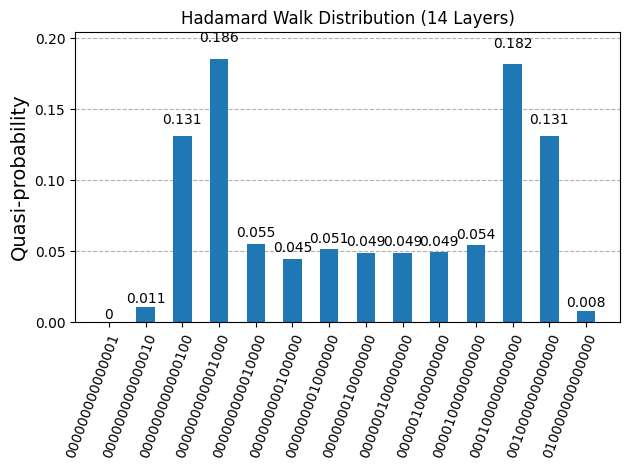

Histogram also saved to: /content/14_layer_hadamard_walk_histogram.png


In [ ]:
# Step 2: After restarting the runtime, run this cell.
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Try to import the display function from IPython for inline plotting
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_hadamard_walk_qgb(n_layers: int):
    """
    Generates a Qiskit Circuit for a Quantum Galton Board that performs
    a Hadamard Quantum Walk. This is achieved by using a bias angle of pi/2,
    which is equivalent to using a Hadamard gate as the "coin" at each step.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the Hadamard Walk QGB.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer Hadamard Walk")

    control_qubit = 0

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.h(control_qubit)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

        if layer < n_layers - 1:
            qc.h(control_qubit)
            qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

# --- Example Usage ---
if __name__ == '__main__':
    # --- Parameters for the simulation ---
    N_LAYERS = 14 # Using more layers to better see the distribution shape

    # 1. Create the Hadamard Walk QGB circuit
    qgb_circuit = create_hadamard_walk_qgb(N_LAYERS)

    # 2. Draw the circuit and display/save it
    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer Hadamard Walk ---")
    circuit_diagram = qgb_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_hadamard_walk_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    # 3. Use the Sampler to run the circuit
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(qgb_circuit, shots=16384) # More shots for better stats
    result = job.result()

    # 4. Get the raw probability distribution from the Sampler
    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Raw Bitstring Probabilities) ---")
    print({k: v for k, v in sorted(raw_probabilities.items())})

    # 5. Plot the raw distribution with bitstrings on the x-axis
    print("\n--- Generating Raw Distribution Histogram ---")
    histogram_figure = plot_histogram(raw_probabilities, title=f"Hadamard Walk Distribution ({N_LAYERS} Layers)")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = f"{N_LAYERS}_layer_hadamard_walk_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    # Close all plot figures to free up memory
    plt.close('all')

## Simulating noise

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeVigoV2


# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

In [ ]:
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
device_backend = FakeVigoV2()

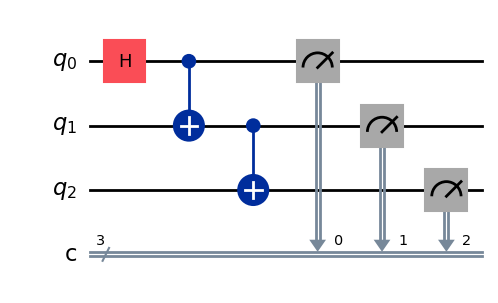

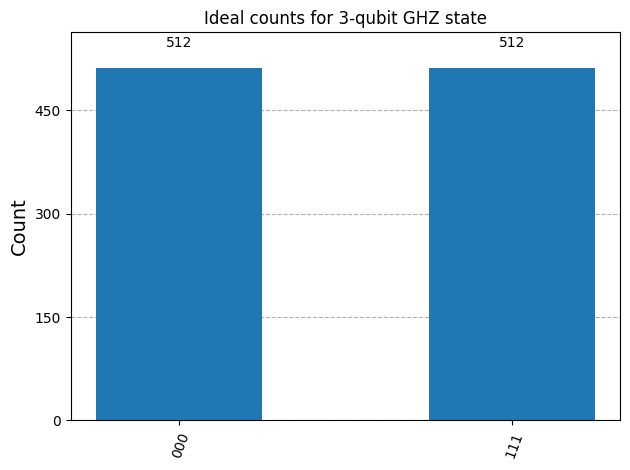

In [ ]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

circuit_diagram = circ.draw(output='mpl', fold=-1)
if IS_IPYTHON:
        display(circuit_diagram)

sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

In [ ]:
sim_vigo = AerSimulator.from_backend(device_backend)

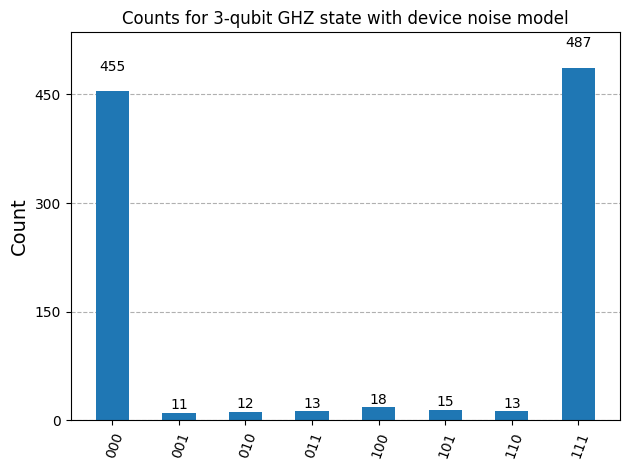

In [ ]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

## extras


--- Circuit Information for 4-Layer QGB ---
Circuit depth: 46
Number of qubits: 10
Number of classical bits: 5

Available devices: ['manhattan', 'torino']

Circuit diagram:
           ░      ┌─────────┐   ┌───┐    ░      ┌───────────┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌─────────────┐   ┌───┐»
q_0: ──────░──|0>─┤ Ry(π/3) ├─■─┤ X ├─■──░──|0>─┤ Ry(4π/15) ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ Ry(0.67021) ├─■─┤ X ├»
           ░      └─────────┘ │ └─┬─┘ │  ░      └───────────┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └─────────────┘ │ └─┬─┘»
q_1: ──────░──────────────────┼───┼───┼──░────────────────────┼───┼───┼───┼───┼───┼───┼──░──────────────────────┼───┼──»
           ░                  │   │   │  ░                    │   │   │   │   │   │   │  ░                      │   │  »
q_2: ──────░──────────────────┼───┼───┼──░────────────────────┼───┼───┼───┼───┼───┼───┼──░──────────────────────X───┼──»
           ░                  │   │   │  ░                    │   │   │   │   │   │   │  ░          

/tmp/ipython-input-1349453235.py:244: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  ideal_dist, noisy_dist, noise_model = compare_ideal_vs_noisy(qgb_circuit, N_LAYERS, shots=8192, device_name=TEST_DEVICE)


Ideal Results (Probabilities):
{0: 0.521240234375, 1: 0.3798828125, 2: 0.09033203125, 3: 0.00830078125, 4: 0.000244140625}

=== NOISY SIMULATION ===
Using device: fake_manhattan
Circuit requires 10 qubits, device has 65 qubits
High optimization failed: 'A connected component of the DAGCircuit is too large for any of the connected components in the coupling map'
Trying with coupling map disabled...
Original circuit depth: 46
Transpiled circuit depth: 318
Number of qubits on device: 65
Noisy Results (Probabilities):
{0: 0.3006591796875, 1: 0.2977294921875, 2: 0.16162109375, 3: 0.125, 4: 0.0079345703125}


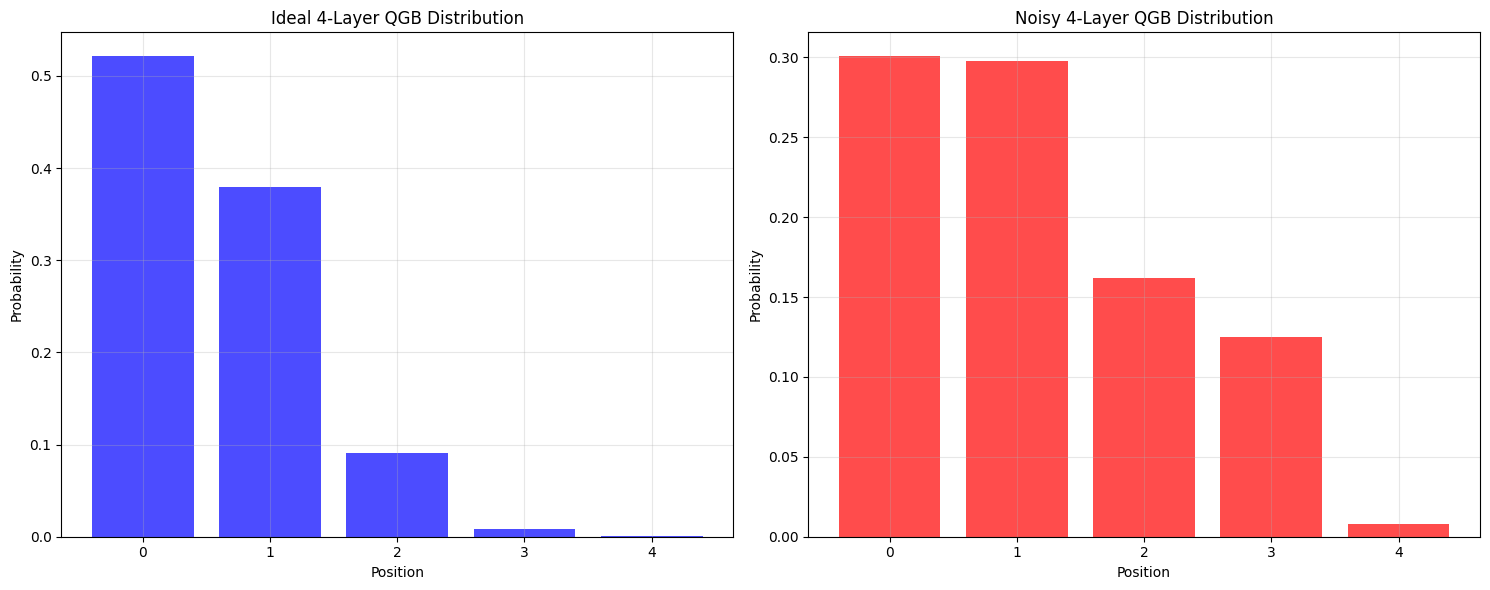


--- Noise Model Information ---
Device used: manhattan
Noise model type: <class 'qiskit_aer.noise.noise_model.NoiseModel'>
Number of noise instructions: 6

--- Difference Analysis ---
Position 0: Ideal=0.5212, Noisy=0.3007, Diff=0.2206
Position 1: Ideal=0.3799, Noisy=0.2977, Diff=0.0822
Position 2: Ideal=0.0903, Noisy=0.1616, Diff=0.0713
Position 3: Ideal=0.0083, Noisy=0.1250, Diff=0.1167
Position 4: Ideal=0.0002, Noisy=0.0079, Diff=0.0077

Total Variation Distance: 0.2492


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManhattanV2, FakeTorino
from qiskit_aer.noise import NoiseModel
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import defaultdict
import os

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_n_layer_qgb(n_layers: int, target_distribution="exponential_custom"):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board with a left-skewed exponential distribution.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        qc.reset(control_qubit)

        base_bias = np.pi/3
        decay_factor = 0.8
        bias_angle = base_bias * (decay_factor ** layer)
        qc.ry(bias_angle, control_qubit)

        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

def get_available_devices():
    """
    List available fake backend devices
    """
    devices = {
        'manhattan': FakeManhattanV2,
        'torino': FakeTorino,
    }
    return devices

def run_noisy_simulation(circuit, shots=8192, device_name='manhattan'):
    """
    Run the circuit with device noise model simulation
    """
    # Get available devices
    devices = get_available_devices()

    # Create fake device backend
    if device_name.lower() in devices:
        fake_device = devices[device_name.lower()]()
    else:
        print(f"Unknown device '{device_name}'. Available devices: {list(devices.keys())}")
        print("Using default: FakeManhattan")
        fake_device = FakeManhattan()

    print(f"Using device: {fake_device.name}")
    print(f"Circuit requires {circuit.num_qubits} qubits, device has {fake_device.num_qubits} qubits")

    # Check if circuit fits on device
    if circuit.num_qubits > fake_device.num_qubits:
        print(f"WARNING: Circuit needs {circuit.num_qubits} qubits but device only has {fake_device.num_qubits}")
        print("Falling back to noise-model-only simulation (no coupling map constraints)")

        # Create noise model from the fake device
        noise_model = NoiseModel.from_backend(fake_device)

        # Create AerSimulator with noise model
        sim_noisy = AerSimulator(noise_model=noise_model)

        # Transpile with basic optimization only
        transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=0)

    else:
        # Create noise model from the fake device
        noise_model = NoiseModel.from_backend(fake_device)

        # Get device properties
        coupling_map = fake_device.coupling_map
        basis_gates = fake_device.basis_gates

        # Create AerSimulator with noise model
        sim_noisy = AerSimulator(
            noise_model=noise_model,
            coupling_map=coupling_map,
            basis_gates=basis_gates
        )

        # Transpile circuit for the noisy backend with higher optimization
        try:
            transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=3)
        except Exception as e:
            print(f"High optimization failed: {e}")
            print("Trying with coupling map disabled...")
            sim_noisy = AerSimulator(noise_model=noise_model)
            transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=1)

    print(f"Original circuit depth: {circuit.depth()}")
    print(f"Transpiled circuit depth: {transpiled_circuit.depth()}")
    print(f"Number of qubits on device: {fake_device.num_qubits}")

    # Run the noisy simulation
    job = sim_noisy.run(transpiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(0)

    return counts, noise_model, transpiled_circuit

def compare_ideal_vs_noisy(circuit, n_layers, shots=8192, device_name='manhattan'):
    """
    Compare ideal simulation vs noisy simulation results
    """
    print("=== IDEAL SIMULATION ===")

    # Use the original Sampler (V1) for compatibility
    sampler = Sampler()
    job = sampler.run(circuit, shots=shots)
    result = job.result()

    # Get counts from the result
    counts_data = result.quasi_dists[0]

    # Convert quasi-distribution to counts and then to probabilities
    ideal_distribution = defaultdict(float, {i: 0.0 for i in range(n_layers + 1)})

    for outcome, probability in counts_data.items():
        # Convert integer outcome to binary string
        bitstring = format(outcome, f'0{n_layers + 1}b')
        try:
            position = bitstring.index('1')
            ideal_distribution[position] += probability
        except ValueError:
            pass

    print("Ideal Results (Probabilities):")
    print({k: v for k, v in sorted(ideal_distribution.items())})

    print("\n=== NOISY SIMULATION ===")
    # Run noisy simulation
    noisy_counts, noise_model, transpiled_circuit = run_noisy_simulation(circuit, shots, device_name)

    # Convert counts to probabilities
    total_shots = sum(noisy_counts.values())
    noisy_distribution = defaultdict(float, {i: 0.0 for i in range(n_layers + 1)})

    for bitstring, count in noisy_counts.items():
        prob = count / total_shots
        try:
            position = bitstring.index('1')
            noisy_distribution[position] += prob
        except ValueError:
            pass

    print("Noisy Results (Probabilities):")
    print({k: v for k, v in sorted(noisy_distribution.items())})

    # Plot comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Ideal histogram
    positions = list(ideal_distribution.keys())
    probabilities = list(ideal_distribution.values())
    ax1.bar(positions, probabilities, alpha=0.7, color='blue')
    ax1.set_title(f'Ideal {n_layers}-Layer QGB Distribution')
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Probability')
    ax1.grid(True, alpha=0.3)

    # Noisy histogram
    positions_noisy = list(noisy_distribution.keys())
    probabilities_noisy = list(noisy_distribution.values())
    ax2.bar(positions_noisy, probabilities_noisy, alpha=0.7, color='red')
    ax2.set_title(f'Noisy {n_layers}-Layer QGB Distribution')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Probability')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()

    if IS_IPYTHON:
        display(fig)
    else:
        plt.show()

    return ideal_distribution, noisy_distribution, noise_model

# --- Example Usage ---
if __name__ == '__main__':
    N_LAYERS = 4

    qgb_circuit = create_n_layer_qgb(N_LAYERS)

    print(f"\n--- Circuit Information for {N_LAYERS}-Layer QGB ---")
    print(f"Circuit depth: {qgb_circuit.depth()}")
    print(f"Number of qubits: {qgb_circuit.num_qubits}")
    print(f"Number of classical bits: {qgb_circuit.num_clbits}")

    # Print available devices
    devices = get_available_devices()
    print(f"\nAvailable devices: {list(devices.keys())}")

    print("\nCircuit diagram:")
    print(qgb_circuit.draw(fold=120))

    print(f"\n--- Comparing Ideal vs Noisy Simulation for {N_LAYERS}-Layer QGB ---")

    # Test device name
    TEST_DEVICE = 'manhattan'

    # Compare ideal and noisy results
    ideal_dist, noisy_dist, noise_model = compare_ideal_vs_noisy(qgb_circuit, N_LAYERS, shots=8192, device_name=TEST_DEVICE)

    # --- Noise Model Information ---
    print(f"\n--- Noise Model Information ---")
    print(f"Device used: {TEST_DEVICE}")
    print(f"Noise model type: {type(noise_model)}")
    print(f"Number of noise instructions: {len(noise_model._noise_instructions) if hasattr(noise_model, '_noise_instructions') else 'N/A'}")

    # Calculate and display the difference between ideal and noisy
    print(f"\n--- Difference Analysis ---")
    total_variation_distance = 0
    for position in range(N_LAYERS + 1):
        ideal_prob = ideal_dist.get(position, 0.0)
        noisy_prob = noisy_dist.get(position, 0.0)
        difference = abs(ideal_prob - noisy_prob)
        total_variation_distance += difference
        print(f"Position {position}: Ideal={ideal_prob:.4f}, Noisy={noisy_prob:.4f}, Diff={difference:.4f}")

    print(f"\nTotal Variation Distance: {total_variation_distance/2:.4f}")

    plt.close('all')


--- Circuit Information for 4-Layer QGB ---
Circuit depth: 46
Number of qubits: 10
Number of classical bits: 5

Available devices: ['manhattan', 'torino']

Circuit diagram:
           ░      ┌─────────┐   ┌───┐    ░      ┌───────────┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌─────────────┐   ┌───┐»
q_0: ──────░──|0>─┤ Ry(π/3) ├─■─┤ X ├─■──░──|0>─┤ Ry(4π/15) ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ Ry(0.67021) ├─■─┤ X ├»
           ░      └─────────┘ │ └─┬─┘ │  ░      └───────────┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └─────────────┘ │ └─┬─┘»
q_1: ──────░──────────────────┼───┼───┼──░────────────────────┼───┼───┼───┼───┼───┼───┼──░──────────────────────┼───┼──»
           ░                  │   │   │  ░                    │   │   │   │   │   │   │  ░                      │   │  »
q_2: ──────░──────────────────┼───┼───┼──░────────────────────┼───┼───┼───┼───┼───┼───┼──░──────────────────────X───┼──»
           ░                  │   │   │  ░                    │   │   │   │   │   │   │  ░          

/tmp/ipython-input-1965893852.py:276: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  ideal_dist, noisy_dist, noise_model = compare_ideal_vs_noisy(qgb_circuit, N_LAYERS, shots=8192, device_name=TEST_DEVICE)


Ideal Results (Probabilities):
{0: 0.5162353515625, 1: 0.37548828125, 2: 0.09814453125, 3: 0.0101318359375, 4: 0.0}

=== NOISY SIMULATION ===
Using device: fake_manhattan
Circuit requires 10 qubits, device has 65 qubits
High optimization failed: 'A connected component of the DAGCircuit is too large for any of the connected components in the coupling map'
Trying with coupling map disabled...
Original circuit depth: 46
Transpiled circuit depth: 318
Number of qubits on device: 65
Noisy Results (Probabilities):
{0: 0.30126953125, 1: 0.2943115234375, 2: 0.153076171875, 3: 0.1187744140625, 4: 0.0084228515625}


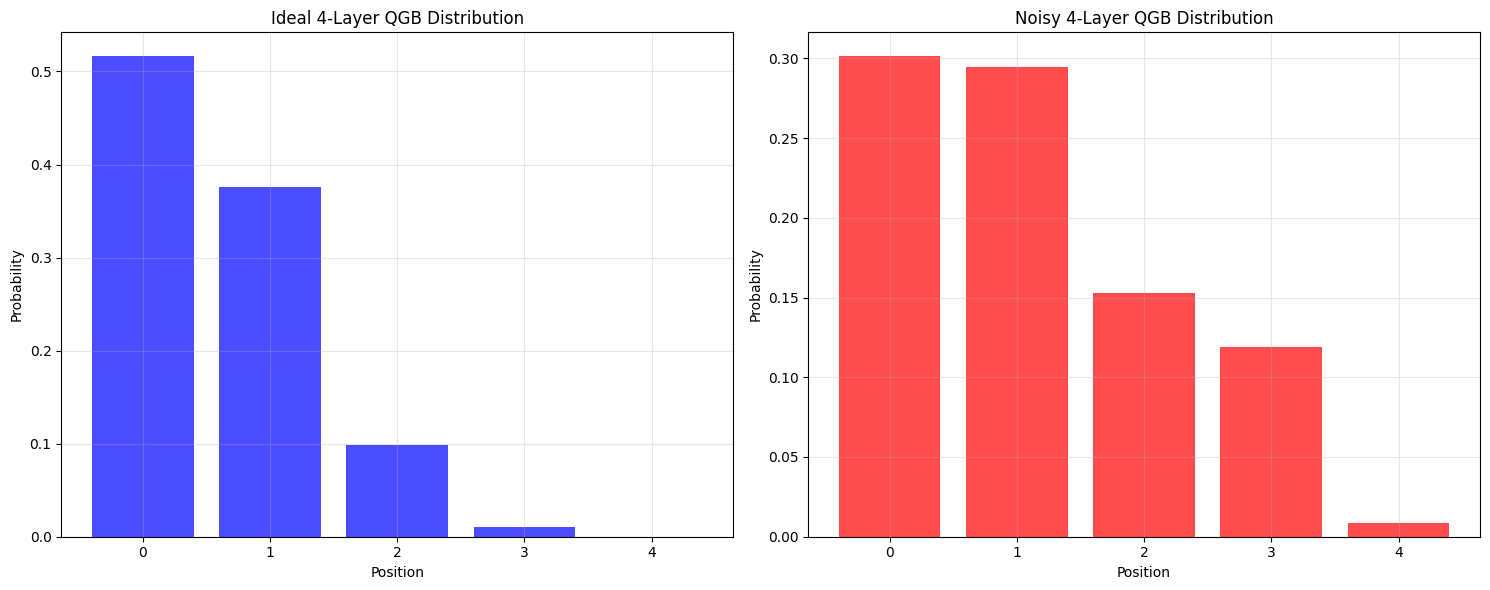


--- Noise Model Information ---
Device used: manhattan
Noise model type: <class 'qiskit_aer.noise.noise_model.NoiseModel'>
Number of noise instructions: 6

--- Difference Analysis ---
Position 0: Ideal=0.5162, Noisy=0.3013, Diff=0.2150
Position 1: Ideal=0.3755, Noisy=0.2943, Diff=0.0812
Position 2: Ideal=0.0981, Noisy=0.1531, Diff=0.0549
Position 3: Ideal=0.0101, Noisy=0.1188, Diff=0.1086
Position 4: Ideal=0.0000, Noisy=0.0084, Diff=0.0084

Total Variation Distance: 0.2341

Jensen-Shannon Divergence: 0.0723268214 bits


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManhattanV2, FakeTorino
from qiskit_aer.noise import NoiseModel
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import defaultdict
import os

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_n_layer_qgb(n_layers: int, target_distribution="exponential_custom"):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board with a left-skewed exponential distribution.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        qc.reset(control_qubit)

        base_bias = np.pi/3
        decay_factor = 0.8
        bias_angle = base_bias * (decay_factor ** layer)
        qc.ry(bias_angle, control_qubit)

        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

def get_available_devices():
    """
    List available fake backend devices
    """
    devices = {
        'manhattan': FakeManhattanV2,
        'torino': FakeTorino,
    }
    return devices

def run_noisy_simulation(circuit, shots=8192, device_name='manhattan'):
    """
    Run the circuit with device noise model simulation
    """
    # Get available devices
    devices = get_available_devices()

    # Create fake device backend
    if device_name.lower() in devices:
        fake_device = devices[device_name.lower()]()
    else:
        print(f"Unknown device '{device_name}'. Available devices: {list(devices.keys())}")
        print("Using default: FakeManhattan")
        fake_device = FakeManhattan()

    print(f"Using device: {fake_device.name}")
    print(f"Circuit requires {circuit.num_qubits} qubits, device has {fake_device.num_qubits} qubits")

    # Check if circuit fits on device
    if circuit.num_qubits > fake_device.num_qubits:
        print(f"WARNING: Circuit needs {circuit.num_qubits} qubits but device only has {fake_device.num_qubits}")
        print("Falling back to noise-model-only simulation (no coupling map constraints)")

        # Create noise model from the fake device
        noise_model = NoiseModel.from_backend(fake_device)

        # Create AerSimulator with noise model
        sim_noisy = AerSimulator(noise_model=noise_model)

        # Transpile with basic optimization only
        transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=0)

    else:
        # Create noise model from the fake device
        noise_model = NoiseModel.from_backend(fake_device)

        # Get device properties
        coupling_map = fake_device.coupling_map
        basis_gates = fake_device.basis_gates

        # Create AerSimulator with noise model
        sim_noisy = AerSimulator(
            noise_model=noise_model,
            coupling_map=coupling_map,
            basis_gates=basis_gates
        )

        # Transpile circuit for the noisy backend with higher optimization
        try:
            transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=3)
        except Exception as e:
            print(f"High optimization failed: {e}")
            print("Trying with coupling map disabled...")
            sim_noisy = AerSimulator(noise_model=noise_model)
            transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=1)

    print(f"Original circuit depth: {circuit.depth()}")
    print(f"Transpiled circuit depth: {transpiled_circuit.depth()}")
    print(f"Number of qubits on device: {fake_device.num_qubits}")

    # Run the noisy simulation
    job = sim_noisy.run(transpiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(0)

    return counts, noise_model, transpiled_circuit

def compare_ideal_vs_noisy(circuit, n_layers, shots=8192, device_name='manhattan'):
    """
    Compare ideal simulation vs noisy simulation results
    """
    print("=== IDEAL SIMULATION ===")

    # Use the original Sampler (V1) for compatibility
    sampler = Sampler()
    job = sampler.run(circuit, shots=shots)
    result = job.result()

    # Get counts from the result
    counts_data = result.quasi_dists[0]

    # Convert quasi-distribution to counts and then to probabilities
    ideal_distribution = defaultdict(float, {i: 0.0 for i in range(n_layers + 1)})

    for outcome, probability in counts_data.items():
        # Convert integer outcome to binary string
        bitstring = format(outcome, f'0{n_layers + 1}b')
        try:
            position = bitstring.index('1')
            ideal_distribution[position] += probability
        except ValueError:
            pass

    print("Ideal Results (Probabilities):")
    print({k: v for k, v in sorted(ideal_distribution.items())})

    print("\n=== NOISY SIMULATION ===")
    # Run noisy simulation
    noisy_counts, noise_model, transpiled_circuit = run_noisy_simulation(circuit, shots, device_name)

    # Convert counts to probabilities
    total_shots = sum(noisy_counts.values())
    noisy_distribution = defaultdict(float, {i: 0.0 for i in range(n_layers + 1)})

    for bitstring, count in noisy_counts.items():
        prob = count / total_shots
        try:
            position = bitstring.index('1')
            noisy_distribution[position] += prob
        except ValueError:
            pass

    print("Noisy Results (Probabilities):")
    print({k: v for k, v in sorted(noisy_distribution.items())})

    # Plot comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Ideal histogram
    positions = list(ideal_distribution.keys())
    probabilities = list(ideal_distribution.values())
    ax1.bar(positions, probabilities, alpha=0.7, color='blue')
    ax1.set_title(f'Ideal {n_layers}-Layer QGB Distribution')
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Probability')
    ax1.grid(True, alpha=0.3)

    # Noisy histogram
    positions_noisy = list(noisy_distribution.keys())
    probabilities_noisy = list(noisy_distribution.values())
    ax2.bar(positions_noisy, probabilities_noisy, alpha=0.7, color='red')
    ax2.set_title(f'Noisy {n_layers}-Layer QGB Distribution')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Probability')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()

    if IS_IPYTHON:
        display(fig)
    else:
        plt.show()

    return ideal_distribution, noisy_distribution, noise_model

def jensen_shannon_divergence(p_dict, q_dict):
    """
    Compute Jensen-Shannon divergence between two distributions (as defaultdicts).
    Normalizes if needed, assumes keys are positions 0 to n.
    """
    # Get all unique keys (positions) and sort
    keys = sorted(set(p_dict.keys()) | set(q_dict.keys()))

    # Convert to arrays, filling missing with 0
    p = np.array([p_dict.get(k, 0.0) for k in keys])
    q = np.array([q_dict.get(k, 0.0) for k in keys])

    # Normalize if sums != 1 (esp. for noisy)
    p = p / np.sum(p) if np.sum(p) != 1 else p
    q = q / np.sum(q) if np.sum(q) != 1 else q

    # Avoid log(0) issues with small epsilon
    epsilon = 1e-10
    p = np.clip(p, epsilon, 1)
    q = np.clip(q, epsilon, 1)

    # Average distribution
    m = 0.5 * (p + q)

    # Kullback-Leibler divergence (base 2 for bits)
    def kl_div(a, b):
        return np.sum(a * np.log2(a / b))

    # JSD
    jsd = 0.5 * kl_div(p, m) + 0.5 * kl_div(q, m)
    return jsd

# --- Example Usage ---
if __name__ == '__main__':
    N_LAYERS = 4

    qgb_circuit = create_n_layer_qgb(N_LAYERS)

    print(f"\n--- Circuit Information for {N_LAYERS}-Layer QGB ---")
    print(f"Circuit depth: {qgb_circuit.depth()}")
    print(f"Number of qubits: {qgb_circuit.num_qubits}")
    print(f"Number of classical bits: {qgb_circuit.num_clbits}")

    # Print available devices
    devices = get_available_devices()
    print(f"\nAvailable devices: {list(devices.keys())}")

    print("\nCircuit diagram:")
    print(qgb_circuit.draw(fold=120))

    print(f"\n--- Comparing Ideal vs Noisy Simulation for {N_LAYERS}-Layer QGB ---")

    # Test device name
    TEST_DEVICE = 'manhattan'

    # Compare ideal and noisy results
    ideal_dist, noisy_dist, noise_model = compare_ideal_vs_noisy(qgb_circuit, N_LAYERS, shots=8192, device_name=TEST_DEVICE)

    # --- Noise Model Information ---
    print(f"\n--- Noise Model Information ---")
    print(f"Device used: {TEST_DEVICE}")
    print(f"Noise model type: {type(noise_model)}")
    print(f"Number of noise instructions: {len(noise_model._noise_instructions) if hasattr(noise_model, '_noise_instructions') else 'N/A'}")

    # Calculate and display the difference between ideal and noisy
    print(f"\n--- Difference Analysis ---")
    total_variation_distance = 0
    for position in range(N_LAYERS + 1):
        ideal_prob = ideal_dist.get(position, 0.0)
        noisy_prob = noisy_dist.get(position, 0.0)
        difference = abs(ideal_prob - noisy_prob)
        total_variation_distance += difference
        print(f"Position {position}: Ideal={ideal_prob:.4f}, Noisy={noisy_prob:.4f}, Diff={difference:.4f}")

    print(f"\nTotal Variation Distance: {total_variation_distance/2:.4f}")

    # Calculate and display Jensen-Shannon Divergence
    jsd_value = jensen_shannon_divergence(ideal_dist, noisy_dist)
    print(f"\nJensen-Shannon Divergence: {jsd_value:.10f} bits")

    plt.close('all')